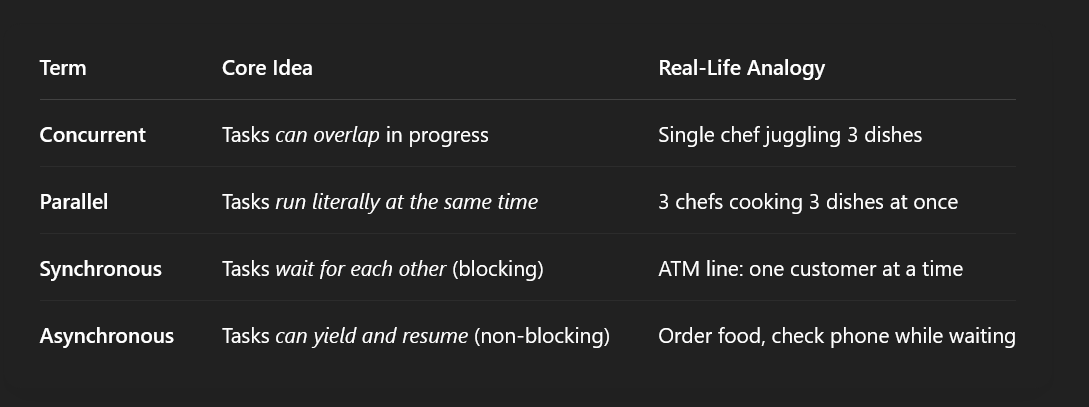

Python asyncio → concurrent and asynchronous

Python threading → concurrent, sometimes parallel (GIL limits it)

Python multiprocessing → truly parallel

<b>await</b> pauses only the coroutine it is in, not the whole program.

This is the beauty of asyncio: while one task is waiting (e.g., for network, I/O), other tasks can keep going.

### Run multiple async tasks together

In [11]:
import asyncio
import time

In [ ]:
async def task(name, delay):
    print(f"Name started  :{name}")
    await asyncio.sleep(delay=delay)
    print(f"{name} finished after: {delay}")

async def main():
    # Run 3 tasks asynchronously (concurrently)
    print(f"started at {time.strftime('%X')}")
    
    # Sequential Execution
    await task("Task A", 2)   # await = pause here and wait
    await task("Task B", 1)   # Each await waits for the previous one to finish.
    await task("Task C", 3)   # Execution is blocked at each step.

    print(f"finished  at {time.strftime('%X')}")
# asyncio.run(main())  Use await directly in Jupyter
#  asyncio.run() starts the event loop, runs your top-level coroutine, and closes the loop when done
# 
await main()    # since loop is already running in jupyter

started at 14:02:16
Name started  :Task A
Task A finished after: 2
Name started  :Task B
Task B finished after: 1
Name started  :Task C
Task C finished after: 3
finished  at 14:02:22


<pre>
await = “pause here until the result is ready”

So using await in sequence = like calling one after another

Concurrency only happens when:

    You create tasks with asyncio.create_task()

    Or run them together with asyncio.gather(), etc.
</pre>

### create_task() = schedule this and keep going

Concurrent Execution with create_task

In [ ]:
async def main():
    print(f"started at {time.strftime('%X')}")

    # All three tasks are scheduled at the same time. 
    # starts them in the background, and the event loop juggles them while they sleep.
    task1 = asyncio.create_task(task("Task A", 2))
    task2 = asyncio.create_task(task("Task B", 1))
    task3 = asyncio.create_task(task("Task C", 3))
    
    await task1
    await task2
    await task3

    print(f"finished  at {time.strftime('%X')}")

await main()

started at 14:03:01
Name started  :Task A
Name started  :Task B
Name started  :Task C
Task B finished after: 1
Task A finished after: 2
Task C finished after: 3
finished  at 14:03:04


### asyncio.gather()

runs multiple awaitables concurrently and waits for all of them to finish.

In [34]:
async def task(name, delay):
    print(f"Name started  :{name}")
    await asyncio.sleep(delay=delay)
    print(f"{name} finished after: {delay}")

async def main():
    # Run 3 tasks asynchronously (concurrently)
    print(f"started at {time.strftime('%X')}")
    
    await asyncio.gather(
        task("Task A", 2),
        task("Task B", 1),
        task("Task C", 3)
    )

    print(f"finished  at {time.strftime('%X')}")
 
await main() 

started at 14:16:10
Name started  :Task A
Name started  :Task B
Name started  :Task C
Task B finished after: 1
Task A finished after: 2
Task C finished after: 3
finished  at 14:16:13


In [35]:
# Return values

async def double(n):
    await asyncio.sleep(1)
    return 2*n

result = await asyncio.gather(double(1), double(2), double(3))
print(result)



[2, 4, 6]


####  pass return_exceptions=True to get results and exceptions together

<pre>
If one task raises an exception, gather() raises it too.
You can pass return_exceptions=True to get results and exceptions together:
</pre>

In [36]:
async def task(name, delay):
    print(f"{name} started")
    await asyncio.sleep(delay)
    print(f"{name} finished after {delay} seconds")
    return f"{name} done"

async def bad_task(name, delay):
    print(f"{name} started (bad)")
    await asyncio.sleep(delay)
    raise ValueError(f"{name} failed after {delay} seconds")

async def main():
    print(f"\n⏰ Started at {time.strftime('%X')}")

    results = await asyncio.gather(
        task("Task A", 2),
        task("Task B", 1),
        bad_task("Task C", 3),
        return_exceptions=True
    )

    print(f"\n✅ Results:")
    for i, result in enumerate(results, start=1):
        print(f"Task {i}: {result}")

    print(f"\n🏁 Finished at {time.strftime('%X')}")

await main()


⏰ Started at 14:30:13
Task A started
Task B started
Task C started (bad)
Task B finished after 1 seconds
Task A finished after 2 seconds

✅ Results:
Task 1: Task A done
Task 2: Task B done
Task 3: Task C failed after 3 seconds

🏁 Finished at 14:30:16


<pre>
💪 Challenge: Parallel Web Pings (Mocked)

Simulate pinging 3 websites in parallel.
Requirements:

    Create async def ping(site: str, delay: int)

        It should await asyncio.sleep(delay) to mock response time

        Print when the ping starts and ends

    Use asyncio.gather() to run all pings in parallel

    Measure the total time

    Bonus: Add one site that fails using raise and handle it
</pre>

In [40]:
class Unreachable(Exception):
    pass

async def ping(site: str, delay: int) -> str:
    print(f"Pinging website:{site}")
    await asyncio.sleep(delay)
    if site == "Shiro":
        raise Unreachable("Shiro not found")
    return f"{site} rechable"

async def ping_site():
    start = time.time()
    for data in await asyncio.gather(
        ping("Google", 1),
        ping("Facebook", 2),
        ping("Shiro", 3),
        return_exceptions=True
    ):
        print(data)
    
    end = time.time()
    print(f"Total time: {end-start}")

await ping_site()

Pinging website:Google
Pinging website:Facebook
Pinging website:Shiro
Google rechable
Facebook rechable
Shiro not found
Total time: 3.0196821689605713
